<a href="https://colab.research.google.com/github/gurkiratshergill/HeartFailurePrediction/blob/main/HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self, in_features=11, h1=10, h2=10 ,h3=10, out_features=2):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)

    return x

torch.manual_seed(13)
model = Model()

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
url = 'https://raw.githubusercontent.com/gurkiratshergill/HeartFailurePrediction/refs/heads/main/heart.csv'
my_df = pd.read_csv(url)

my_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
my_df['Sex'] = my_df['Sex'].replace('M', 0)
my_df['Sex'] = my_df['Sex'].replace('F', 1)

my_df['ChestPainType'] = my_df['ChestPainType'].replace('TA', 0)
my_df['ChestPainType'] = my_df['ChestPainType'].replace('ATA', 1)
my_df['ChestPainType'] = my_df['ChestPainType'].replace('NAP', 2)
my_df['ChestPainType'] = my_df['ChestPainType'].replace('ASY', 3)

my_df['RestingECG'] = my_df['RestingECG'].replace('Normal', 0)
my_df['RestingECG'] = my_df['RestingECG'].replace('ST', 1)
my_df['RestingECG'] = my_df['RestingECG'].replace('LVH', 2)

my_df['ExerciseAngina'] = my_df['ExerciseAngina'].replace('N', 0)
my_df['ExerciseAngina'] = my_df['ExerciseAngina'].replace('Y', 1)

my_df['ST_Slope'] = my_df['ST_Slope'].replace('Up', 0)
my_df['ST_Slope'] = my_df['ST_Slope'].replace('Flat', 1)
my_df['ST_Slope'] = my_df['ST_Slope'].replace('Down', 2)

my_df.head()

<ipython-input-20-a5adb5e5705c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['Sex'] = my_df['Sex'].replace('F', 1)
<ipython-input-20-a5adb5e5705c>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['ChestPainType'] = my_df['ChestPainType'].replace('ASY', 3)
<ipython-input-20-a5adb5e5705c>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0


In [21]:
X = my_df.drop('HeartDisease', axis=1)
y = my_df['HeartDisease']

In [22]:
X = X.values
y = y.values

In [23]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [24]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [25]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [26]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [28]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch:{i} and loss:{loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:0.7307082414627075
Epoch:10 and loss:0.6097536683082581
Epoch:20 and loss:0.5671204924583435
Epoch:30 and loss:0.5375627875328064
Epoch:40 and loss:0.5212789177894592
Epoch:50 and loss:0.5062180757522583
Epoch:60 and loss:0.4921145439147949
Epoch:70 and loss:0.47352007031440735
Epoch:80 and loss:0.4436390995979309
Epoch:90 and loss:0.41311636567115784


Text(0.5, 0, 'epoch')

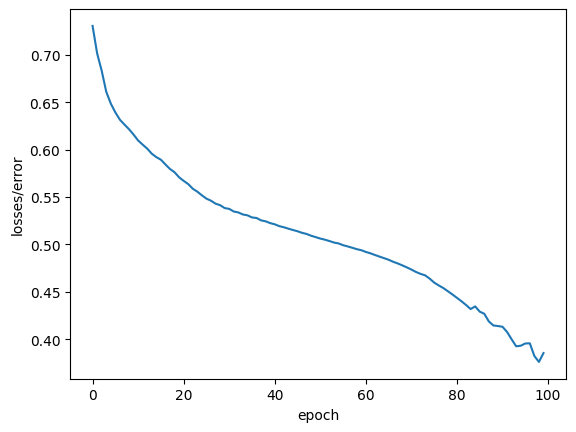

In [29]:
plt.plot(range(epochs), losses)
plt.ylabel("losses/error")
plt.xlabel("epoch")

In [30]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
loss


tensor(0.4231)

In [33]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == y_val.argmax().item():
      correct+=1

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_trues, y_preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

1.) tensor([-0.4534,  1.5674]) 	 1 	 1
2.) tensor([ 1.4931, -1.3608]) 	 0 	 0
3.) tensor([-0.5163,  1.6656]) 	 1 	 1
4.) tensor([ 0.8866, -0.4541]) 	 1 	 0
5.) tensor([-0.6623,  1.9518]) 	 1 	 1
6.) tensor([0.3483, 0.3586]) 	 0 	 1
7.) tensor([ 1.1708, -0.8789]) 	 0 	 0
8.) tensor([ 0.9322, -0.5230]) 	 1 	 0
9.) tensor([ 1.5146, -1.3943]) 	 0 	 0
10.) tensor([-0.1571,  1.1216]) 	 1 	 1
11.) tensor([ 0.9576, -0.5614]) 	 1 	 0
12.) tensor([0.5491, 0.0554]) 	 1 	 0
13.) tensor([-0.2687,  1.2895]) 	 1 	 1
14.) tensor([ 1.5426, -1.4400]) 	 0 	 0
15.) tensor([ 0.9114, -0.4917]) 	 0 	 0
16.) tensor([ 1.3751, -1.1830]) 	 1 	 0
17.) tensor([-0.1216,  1.0681]) 	 1 	 1
18.) tensor([-0.3872,  1.4677]) 	 1 	 1
19.) tensor([0.3105, 0.4157]) 	 1 	 1
20.) tensor([ 0.6396, -0.0812]) 	 0 	 0
21.) tensor([ 0.7397, -0.3468]) 	 0 	 0
22.) tensor([0.5629, 0.0108]) 	 0 	 0
23.) tensor([-0.9059,  2.4986]) 	 1 	 1
24.) tensor([ 0.9109, -0.6052]) 	 0 	 0
25.) tensor([0.2833, 0.4568]) 	 0 	 1
26.) tensor([-0.165